<a href="https://colab.research.google.com/github/KevOdhiambo/Autolib-Network-Analysis-Hypothesis-Testing/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_05_Kevin_Odhiambo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autolib Network Hypothesis Testing



##a) Specifying the Data Analytic Question 


Our problem statemnet is to Investigate a claim regarding the blue cars from the Autolib dataset.

H0 : The mean of Blue Cars dropped off on weekdays is equal to the mean of Utilib Cars dropped off on weekdays

H1: The mean of Blue Cars dropped off during weekdays is different to the mean of Utilib Cars dropped off during weekdays(Claim)

##b) Defining the Metric for Success 

The objectives for this data includes investigating the claim mae above and finding out whether the mean number of blue cars dropped off/returned during weekdays is similar to mean number of utilib cars returned on the same days or not.


##c) Understanding the context

Just like before, I have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.


##d) Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording our observations.

Implement the solution by performing hypothesis testing.

Challenge my solution by providing insights on how I can make improvements. 

##e) Relevance of the data

The we I sed for the analysis was availed and its an open source data. The dataset contains 13 columns and more six thousand rows showing the daily aretgation by date, postal code and other events regarding the Autolib network. The dataset used was ranging from january to july of 2018 and is relevant for this analysis

# Data Exploration

In [64]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [65]:
#load the dataset glossary
col_info=pd.read_excel("columns_explanation.xlsx")
col_info


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [66]:
#load the dataset and preview first 10 data
autolib=pd.read_csv("autolib_daily_events_postal_code.csv")
autolib.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [67]:
#preview the last 10 data
autolib.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [68]:
#sample 5 records in autoli dataframe
autolib.sample(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
11706,93360,3/4/2018,1440,6,weekend,35,33,0,0,1,3,0,0
4188,91370,5/28/2018,1440,0,weekday,12,15,0,0,0,0,0,0
13019,94000,2/22/2018,1440,3,weekday,82,95,2,3,6,7,0,0
5775,92190,1/7/2018,1440,6,weekend,92,83,1,1,7,8,0,0
6932,92260,3/16/2018,1440,4,weekday,38,34,0,0,3,3,0,0


# Checking the Data

In [69]:
# Check datatypes
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [70]:
#dataset Shape
autolib.shape

#the dataset has 16,085 rows and 13 columns

(16085, 13)

In [71]:
#check for duplicates in the dataset
autolib.duplicated().sum()

#there are no duplicates in the data

0

In [72]:
#checking for outliers using quantiles
#1st quartile is Q1=0.25
#3rd quartile is Q3=0.75

Q1 =autolib.quantile(0.25)
Q3 =autolib.quantile(0.75)

#getting the interquantile range(IQR)
IQR=Q3-Q1
IQR
#removing outliers
autolib2 = autolib[~((autolib < (Q1 - 1.5 * IQR)) | (autolib > (Q3 + 1.5 * IQR))).any(axis=1)]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


In [73]:
#ceck the dataset shape after removing outliers
autolib2.shape

#there are 9,783 rows and 13 columns

(9783, 13)

In [74]:
#check for null values in the dataset
autolib2.isnull().sum()

#there are no null values in all the comuns

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [75]:
#check for unique values in the autolib dataset
autolib2.nunique()

Postal code                79
date                      130
n_daily_data_points         3
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

In [76]:
#show the unique values in specific columns in the autolib dataset
unique_col = ['Postal code', 'date', 'dayOfWeek', 'day_type']
for col in unique_col:
  print(f'Column Name: {col}')
  print(autolib2[col].unique())
  print('\n')

Column Name: Postal code
[91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160 92170
 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300 92310
 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420 92500
 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260 93300
 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800 94000
 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340 94410
 94450 94500 94700 94800 95100 95870 95880]


Column Name: date
['1/1/2018' '1/2/2018' '1/3/2018' '1/5/2018' '1/7/2018' '1/8/2018'
 '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018' '1/13/2018' '1/14/2018'
 '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018' '1/19/2018' '1/20/2018'
 '1/21/2018' '1/22/2018' '1/23/2018' '1/27/2018' '1/28/2018' '1/29/2018'
 '1/30/2018' '1/31/2018' '2/1/2018' '2/2/2018' '2/3/2018' '2/4/2018'
 '2/5/2018' '2/6/2018' '2/7/2018' '2/8/2018' '2/9/2018' '2/10/2018'
 '2/11/2018' '2/12/2018' '2/13/2018' '2/14/2018' '2

# Exploratory Data Analysis

In [77]:
#rename columns and to be uniform
columns = autolib2.columns.tolist()
for col in range(len(columns)):
  columns[col] = columns[col].lower().replace(" ", "_")

autolib2.columns = columns

In [78]:
#preview column names
autolib2.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [79]:
#we drop unnecessary columns to remain with the required columns and their data
autolib2.drop(['date', 'n_daily_data_points', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
autolib2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum
3899,91330,0,weekday,19,9,0,0
3900,91330,1,weekday,10,10,0,0
3901,91330,2,weekday,11,13,0,0
3903,91330,4,weekday,10,6,0,0
3905,91330,6,weekend,28,17,0,0
...,...,...,...,...,...,...,...
16079,95880,3,weekday,15,13,0,0
16080,95880,4,weekday,15,10,0,0
16081,95880,5,weekend,19,19,0,0
16082,95880,6,weekend,33,35,1,1


In [80]:
#previewing a sample of 5 variables from our new dataset
autolib2.sample(5)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum
8386,92360,6,weekend,1,3,0,0
14012,94150,1,weekday,24,22,0,0
15420,94700,6,weekend,30,35,1,2
15106,94450,4,weekday,14,16,0,0
14502,94230,6,weekend,52,54,1,1


In [81]:
#now we get to choose the day of data we are to work with. 
#in this case we will work with the weekdays
autolib3 = autolib2[autolib2.day_type == 'weekday']
autolib3.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum
13197,94100,0,weekday,1,4,0,0
10667,93170,0,weekday,30,34,3,2
5234,92140,1,weekday,69,75,2,4
14717,94340,0,weekday,25,29,3,1
10629,93170,1,weekday,52,47,2,2
12601,93600,0,weekday,18,16,0,0
8836,92390,0,weekday,14,13,0,0
14209,94160,4,weekday,71,63,2,2
8784,92390,4,weekday,10,8,0,0
12322,93440,2,weekday,7,5,0,0


In [82]:
#check the shape of our new dataset
autolib3.shape

#the dataset has 6,820 entries with 7 columns

(6820, 7)

# Univariate Analysis

In [83]:
#describe our dataset
autolib3[['bluecars_taken_sum','bluecars_returned_sum', 'utilib_taken_sum','utilib_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum
count,6820.000000,6820.000000,6820.000000,6820.000000
mean,45.560557,45.689150,1.392669,1.390029
std,44.590618,44.217408,1.828328,1.793592
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,0.000000,0.000000
50%,30.000000,31.000000,1.000000,1.000000
75%,61.000000,60.000000,2.000000,2.000000
max,291.000000,291.000000,10.000000,10.000000


Text(0.5, 1.0, 'Plot showing Blue car return rate per day in the week(Mon-Fri')

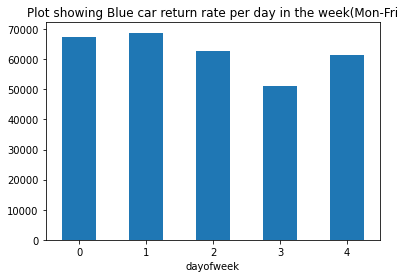

In [84]:
# plot howing the return rate of blue cars per day between monday to friday
autolib3.groupby('dayofweek')['bluecars_returned_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Plot showing Blue car return rate per day in the week(Mon-Fri')

tuesdays(1) have the highest numbers of cars being returned in France

Text(0.5, 1.0, 'Plot Showing Blue Car Pick Up Rate between Mon to Fri')

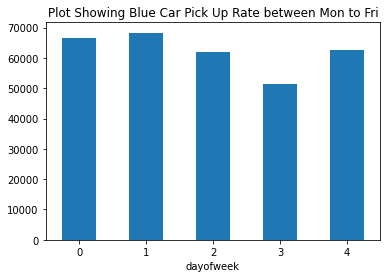

In [85]:
# Pickup rate of blue cars per day of the week(Mon-Fri)
autolib3.groupby('dayofweek')['bluecars_taken_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Plot Showing Blue Car Pick Up Rate between Mon to Fri')

From our plot, we can tell that Tuesday(1) is the day most cars are picked.

Text(0.5, 1.0, 'Plot showing Utilib car return rate per day in a week(Mon-Fri')

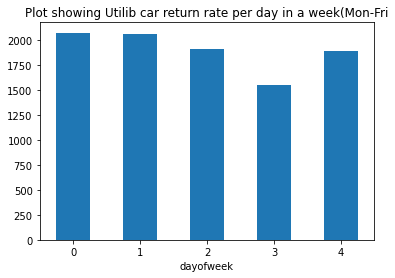

In [86]:
# plot howing the return rate of utilib cars per day between monday to friday
autolib3.groupby('dayofweek')['utilib_returned_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Plot showing Utilib car return rate per day in a week(Mon-Fri')

Monday is the day many Utilib cars are returned

Text(0.5, 1.0, 'Plot showing Utilib car pick up rate per day in a week(Mon-Fri')

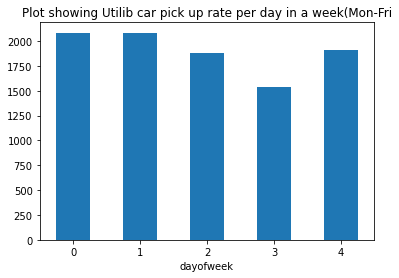

In [87]:
# plot showing the pick up rate of utilib cars per day between monday to friday
autolib3.groupby('dayofweek')['utilib_taken_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Plot showing Utilib car pick up rate per day in a week(Mon-Fri')

Tuesday has the highest pick up rates for utilib cars followed closely by monday

# Bivariate Analsysis

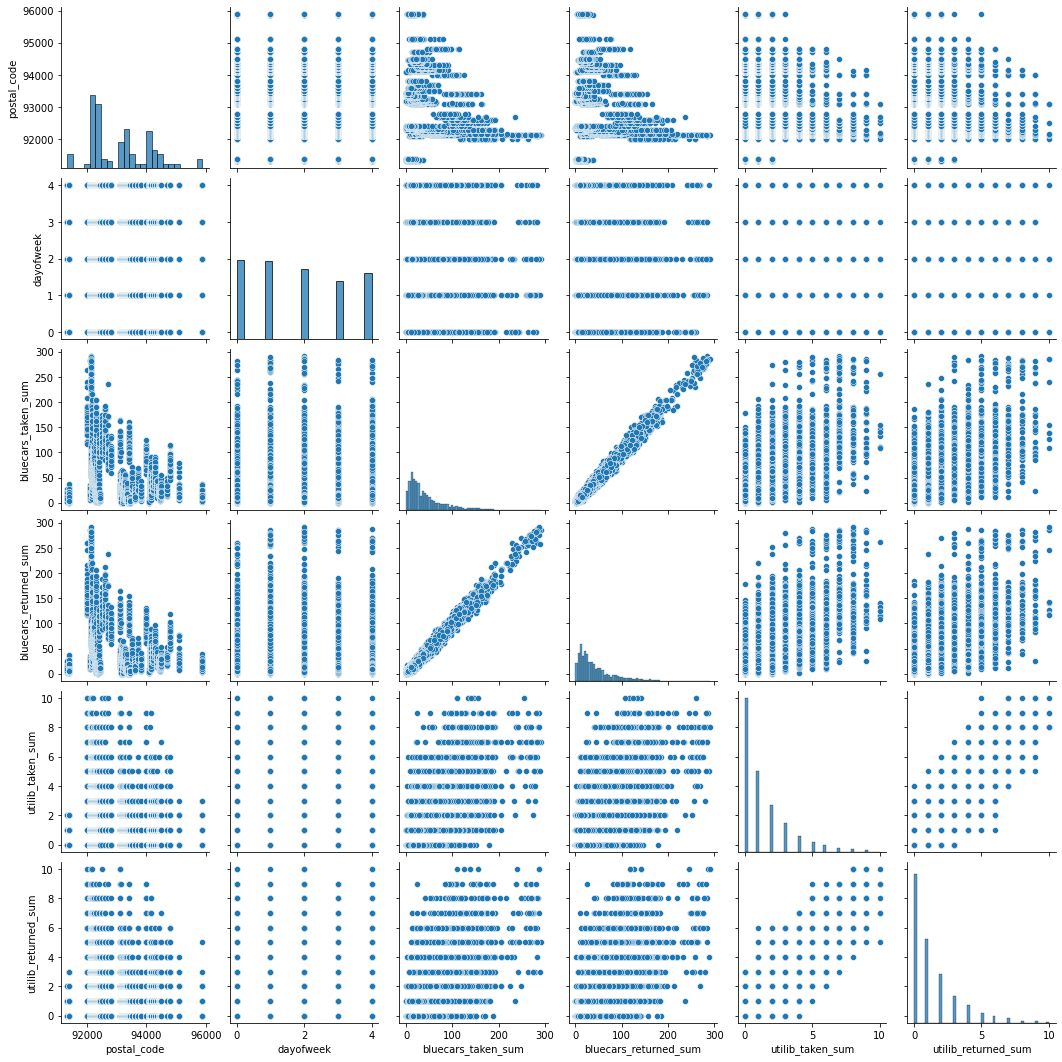

In [88]:
# Plot showing the bivariate summaries and notin the observations
sns.pairplot(autolib3)
plt.show()

<Figure size 864x864 with 0 Axes>

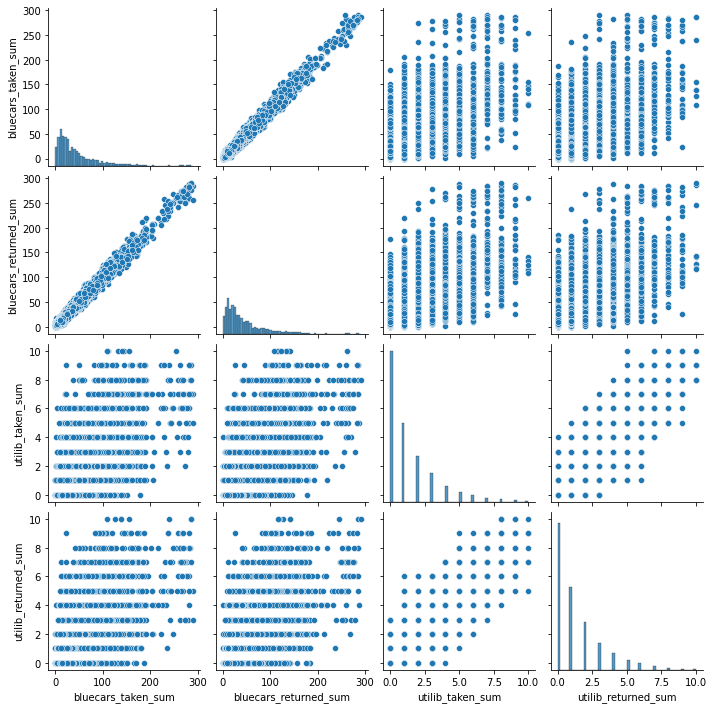

In [89]:
#showing the correlation between the numerical variales
plt.figure(figsize=(12,12))
sns.pairplot(autolib3[['bluecars_taken_sum','bluecars_returned_sum','utilib_taken_sum','utilib_returned_sum']])

1. The bluecars taken sum and blue cars returned sum are positively correlated. the more blue cars are returned, the more more blue cars are picked.
2. blue cars taken sum peaks when the week starts and declines towards friday. this is the same for blue cars returned sum. The return and pick p is skewed to the right.
3. Utilib taken sum is postively coreeelated to utilib returned sum. 
4. Utilib returned sum is skewed to the right right as well as utili taken sum

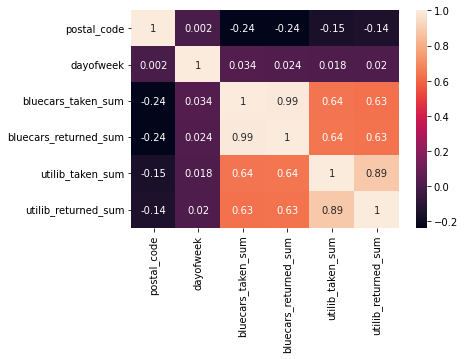

In [90]:
# Correlation in the Numeric Variables
sns.heatmap(autolib3.corr(),annot=True)


In [91]:
#Findng out the avarage blue cars pick up sum by postal codes
bluecar_pick_sum = autolib3.groupby(['postal_code'])['bluecars_taken_sum'].mean().sort_values(ascending=False)
bluecar_pick_sum.head(10)


postal_code
92100    266.333333
92130    259.000000
92000    163.197531
92150    159.898876
92300    156.240000
92600    142.270588
92500    127.639535
93100    114.804598
93400    111.056818
92700    103.720930
Name: bluecars_taken_sum, dtype: float64

The postal codes with the highest average number of pick ups is (92) which is Hauts-de-Seine in France

In [92]:
#Finding out the avaerage blue cars dropp off sum by postal codes
bluecar_dropoff_sum = autolib3.groupby(['postal_code'])['bluecars_returned_sum'].mean().sort_values(ascending=False)
bluecar_dropoff_sum.head(10)

postal_code
92100    262.333333
92130    256.350877
92000    160.679012
92150    159.000000
92300    154.573333
92600    142.388235
92500    130.732558
93100    116.471264
93400    109.022727
92700    104.360465
Name: bluecars_returned_sum, dtype: float64

Also here the postal code with high average drop off is (92) Hauts-de-Seine.

In [93]:
#Finding out the avaerage utilib cars drop off sum by postal codes
utilib_dropoff_sum = autolib3.groupby(['postal_code'])['utilib_returned_sum'].mean().sort_values(ascending=False)
utilib_dropoff_sum.head(10)

postal_code
92100    6.666667
92130    6.070175
92000    4.444444
92600    4.258824
92150    4.134831
93100    4.091954
92500    3.976744
92300    3.573333
93400    3.500000
94000    3.255556
Name: utilib_returned_sum, dtype: float64

the postal code with high average drop off is (92) Hauts-de-Seine.

In [94]:
#Finding out the avaerage utilib cars taken sum by postal codes
utilib_pickup_sum = autolib3.groupby(['postal_code'])['utilib_taken_sum'].mean().sort_values(ascending=False)
utilib_pickup_sum.head(10)

postal_code
92100    6.666667
92130    6.263158
92000    4.654321
92600    4.482353
92150    4.202247
92500    4.151163
93100    4.057471
93400    3.636364
92300    3.600000
94000    3.244444
Name: utilib_taken_sum, dtype: float64

the postal code with high average taken sum is (92) Hauts-de-Seine.

# Hypothesisis Testing

H0 : The mean of Blue Cars dropped off on weekdays is equal to the mean of Utilib Cars dropped off on weekdays

Ha: The mean of Blue Cars dropped off weekdays is different to the mean of Utilib Cars dropped off weekdays

##Selecting a Sample to work with

In [95]:
def sys_sample(df,r,n):
  k = df.shape[0] // n
  index = [None]* n
  a = r
  index[0] = a

  for i in np.arange(1,n):
    a = a + k
    if a > df.shape[0]:
      a = a - df.shape[0]

    index[i] = a
  return(df.iloc[index])

sampling_df = sys_sample(autolib3[autolib3['day_type'] == 'weekday'], r=5, n=200)
sampling_df.head(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum
3907,91330,1,weekday,3,9,0,0
3966,91330,0,weekday,5,6,0,0
4026,91330,1,weekday,1,9,0,0
4084,91370,1,weekday,16,15,0,0
4138,91370,2,weekday,7,13,0,0
4203,91370,1,weekday,8,7,0,0
4257,91400,4,weekday,7,5,0,0
4314,91400,1,weekday,3,3,0,0
4376,92000,3,weekday,147,132,4,6
4440,92000,0,weekday,172,145,3,3


##Check if data is normarlly distributed

In [96]:
#import required library
from scipy.stats import shapiro 

# testing for normality for Utilib Cars dropped off

stat, p = shapiro(sampling_df['utilib_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Our Sample looks Gaussian')
else:
	print('The Sample does not look Gaussian')

Statistics=0.739, p=0.000
The Sample does not look Gaussian


In [97]:
# testing for normality for Bluecars dropped off 
stat, p = shapiro(sampling_df['bluecars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.827, p=0.000
Sample does not look Gaussian


##Point Estimation

In [98]:
# Population Mean for BlueCars
population_B = autolib3[autolib3['day_type'] == 'weekday']
population_mean = population_B['bluecars_returned_sum'].mean()

# The sample mean
sample_mean = sampling_df['bluecars_returned_sum'].mean()

#point estimator
population_mean - sample_mean

-1.680850439882697

In [99]:
# Population Mean for Utilib

population_U = autolib3['utilib_returned_sum'].mean()

# The sample mean
sample_mean_U = sampling_df['utilib_returned_sum'].mean()

#point estimator
population_U - sample_mean_U

0.15502932551319648

##T-test

In [100]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(sampling_df['bluecars_returned_sum'],sampling_df['utilib_returned_sum'])

print("This is our p-value", pval)
print("This is value of the ttest", ttest)
# To determine i
if pval < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We fail to reject the Null Hypothesis")

This is our p-value 2.9469938244295565e-40
This is value of the ttest 14.910263182517378
We reject the Null Hypothesis


##The Confidence Level

In [101]:
# Calculating the Confidence level for Utilib returned Cars

#sample size
samplesize_utilib = len(sampling_df['utilib_returned_sum'])
samplesize_utilib

#standard error
stderror_utilib = sampling_df['utilib_returned_sum'].std()/np.sqrt(samplesize_utilib)
stderror_utilib

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=stderror_utilib)

# We can be 95% certain that the population mean data is between 47.13 and 47.61

(47.132998411472094, 47.6070015885279)

In [102]:
# Calculating the Confidence level for Blue Cars

#sample size
samplesize_blue = len(sampling_df['bluecars_returned_sum'])
samplesize_blue

#standard error
std_error = sampling_df['bluecars_returned_sum'].std()/np.sqrt(samplesize_blue)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between 41.31 and 53.42

(41.310156467877, 53.429843532122995)

#Conlusion

We reject our Null Hypothesis of the mean Blue Cars returned sum on weekdays is equal to Utilib Cars returned on weekdays as the p-value(p=2.9469938244295565e-40) is less than 0.05 thus statisticcaly signiicant to reject the null hypothesis.